In [125]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [126]:
N = 400
delta_tau = 1/N
list_tau = np.arange(start=0, stop=100, step=delta_tau)

In [127]:
x_0 = np.zeros(N)
x_0.shape

(400,)

# Problem 3a

In [134]:
def S(x, d_tau):
    T = 0
    V = 0
    for j in range(1, x.shape[0]-1):
        T += (1/2)*((x[j]-x[j-1])/d_tau)**2
        V += (1/2)*((x[j]+x[j-1])/2)**2
    return T+V, T, V

def metropolis_algorithm(initial_state, num_trials, d_tau):
    sequence_states = [initial_state]
    for _ in tqdm(range(num_trials)):
        next_sequence = metropolis_step(sequence_states[-1], d_tau)
        sequence_states.append(next_sequence)
    return np.array(sequence_states)
    
def metropolis_step(current_state, d_tau):
    trial_configuration = current_state.copy()
    which_x = np.random.randint(1,current_state.shape[0]-1)
    trial_configuration[which_x] += np.random.uniform(low=-1, high=1)
    delta_S = S(trial_configuration, d_tau)[0] - S(current_state, d_tau)[0]
    trial_acceptance_prob = np.min([1, np.exp(-delta_tau*delta_S)])
    r_accept = np.random.rand()
    if r_accept < trial_acceptance_prob:
        new_state = trial_configuration
    else:
        new_state = current_state
    return np.array(new_state)

In [135]:
N_simulation = 100000
X = metropolis_algorithm(x_0, N_simulation, delta_tau)

100%|██████████| 100000/100000 [01:05<00:00, 1517.99it/s]


In [136]:
E_kin = []
E_pot = []

for i in tqdm(range(N_simulation)):
    _, e_kin, e_pot = S(X[i], delta_tau)
    E_kin.append(e_kin)
    E_pot.append(e_pot)
        
E_kin = np.array(E_kin)
E_pot = np.array(E_pot)

100%|██████████| 100000/100000 [00:32<00:00, 3093.19it/s]


Text(0, 0.5, 'Energy')

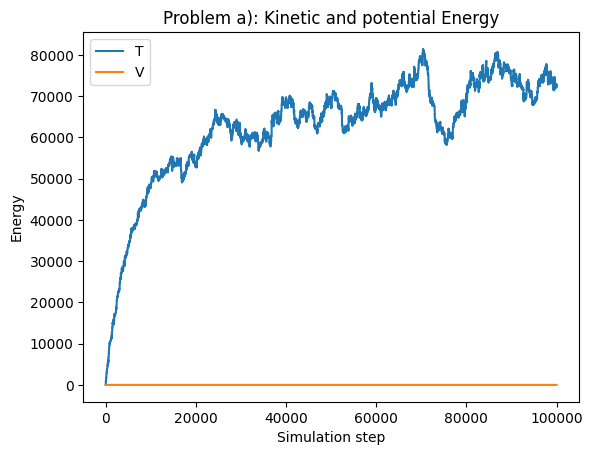

In [137]:
t = np.arange(N_simulation)
plt.plot(t, E_kin, label="T")
plt.plot(t, E_pot, label="V")
plt.legend()
plt.title("Problem a): Kinetic and potential Energy")
plt.xlabel("Simulation step")
plt.ylabel("Energy")

In [138]:
E_pot[-1]

0.9704341128058521

# Problem 3b

Text(0, 0.5, 'relative frequency')

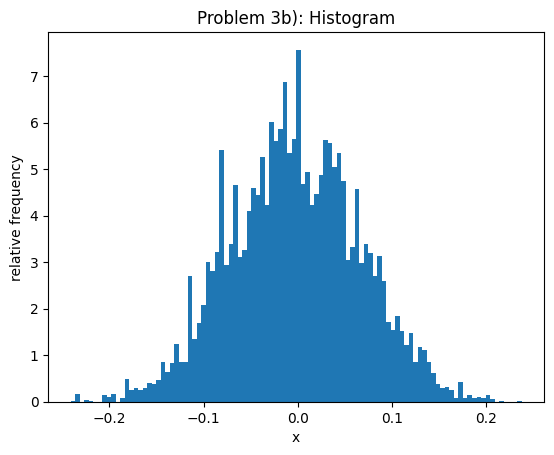

In [139]:
t_equilibrium = 50000

vals, bins = np.histogram(X[t_equilibrium:], bins=100, density=True)
plt.stairs(vals, bins, fill=True)
plt.title("Problem 3b): Histogram")
plt.xlabel("x")
plt.ylabel("relative frequency")